# Drilling Trajectory `F-5`

In [1]:
cd ~/Desktop/Tesis/Notebooks

/home/luis/Desktop/Tesis/Notebooks


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F5/trajectory

/home/luis/Desktop/Tesis/F5/trajectory


In [4]:
ls

1.xml  Book1.xlsx  MetaDataFileInfo.txt


In [5]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
files = os.listdir()
files.remove("MetaDataFileInfo.txt")
files.remove("Book1.xlsx")
files

['1.xml']

In [7]:
for file in files:
    sc.read_xml(file)

File :  1.xml

Wellbore name: NO 15/9-F-5
Wellbore section: MWD-15/9-F-5
Start date: 2016-08-28T10:32:12.000Z
Final md : 3761.77001953125 [m]
Surveys: 97 




In [8]:
traj_wellbore = sc.read_xml(files[0])

File :  1.xml

Wellbore name: NO 15/9-F-5
Wellbore section: MWD-15/9-F-5
Start date: 2016-08-28T10:32:12.000Z
Final md : 3761.77001953125 [m]
Surveys: 97 




In [9]:
traj_wellbore

,md,tvd,dispNs,dispEw,incl,azi,dls,neg_tvd
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
1,145.899994,145.899994,0.000000,0.000000,0.000000,0.000000,0.000000,-145.899994
2,146.000000,146.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-146.000000
3,154.899994,154.899982,-0.009374,-0.008158,0.002793,3.857701,0.000314,-154.899982
4,195.300003,195.299828,-0.065922,0.052531,0.004887,1.713041,0.000169,-195.299828
...,...,...,...,...,...,...,...,...
93,3642.070068,3157.971685,32.573648,1307.338473,0.957139,0.386590,0.000080,-3157.971685
94,3682.429932,3181.129784,63.179152,1319.825282,0.962200,0.388161,0.000129,-3181.129784
95,3722.879883,3204.733187,93.604499,1332.205129,0.933228,0.384671,0.000720,-3204.733187
96,3761.770020,3228.099703,122.420063,1343.870781,0.919265,0.384671,0.000359,-3228.099703


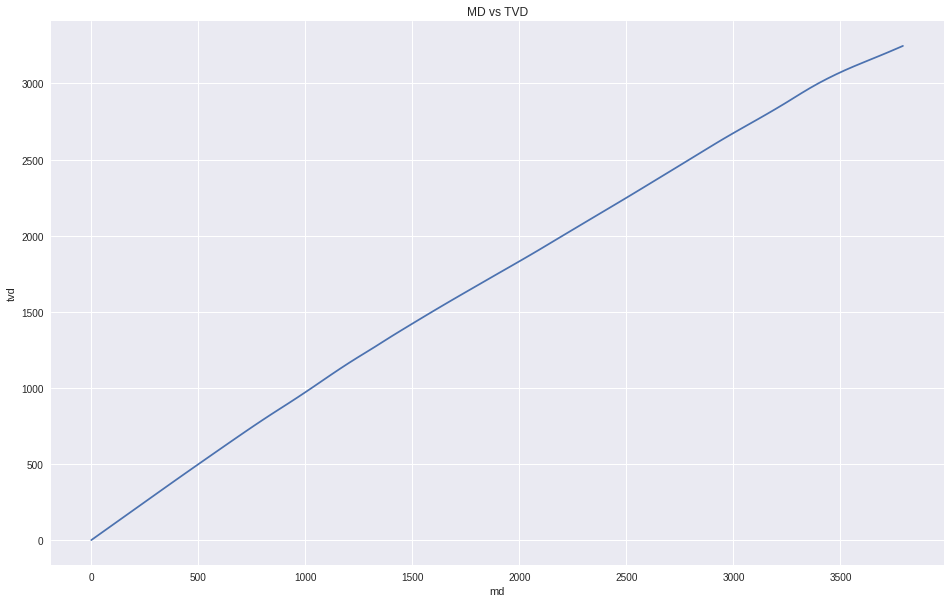

In [10]:
sc.plts_traj(traj_wellbore,"md","tvd","MD vs TVD","")

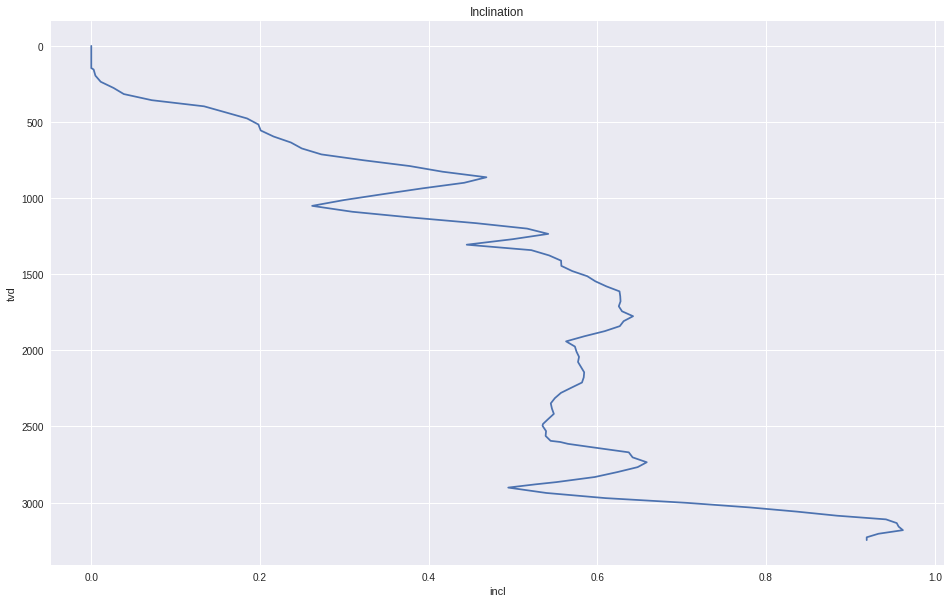

In [11]:
sc.plts_traj(traj_wellbore,"incl","tvd","Inclination","invert")

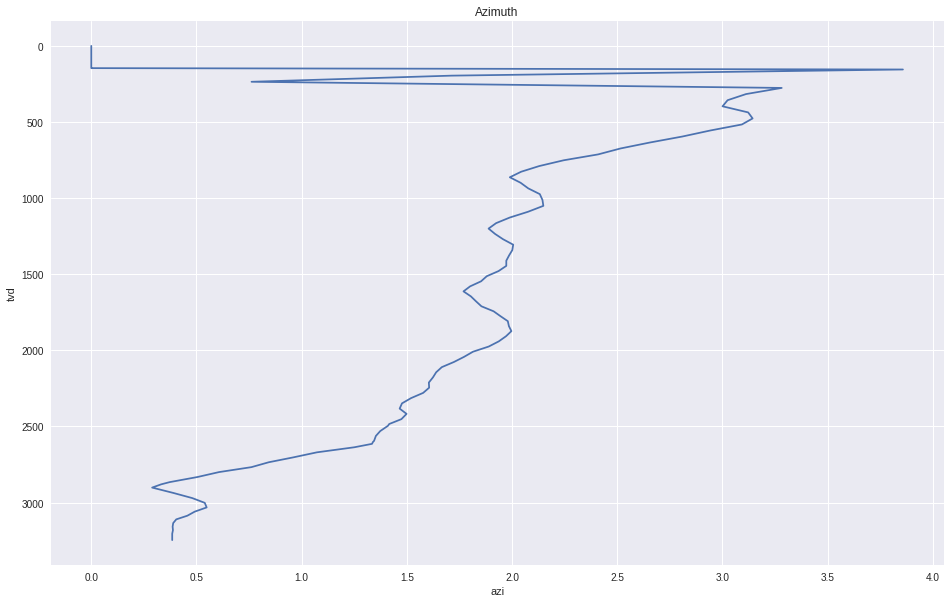

In [12]:
sc.plts_traj(traj_wellbore,"azi","tvd","Azimuth","invert")

In [13]:
traj_wellbore.columns

Index(['md', 'tvd', 'dispNs', 'dispEw', 'incl', 'azi', 'dls', 'neg_tvd'], dtype='object')

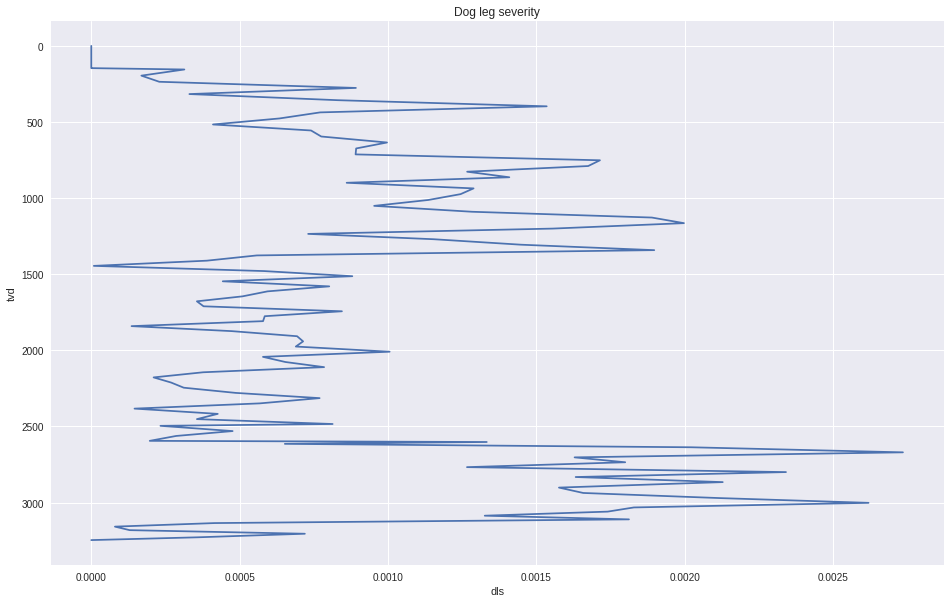

In [14]:
sc.plts_traj(traj_wellbore,"dls","tvd","Dog leg severity","invert")

Maximum rate 0.12° every 30meter
    1700 - 2500 : same rate

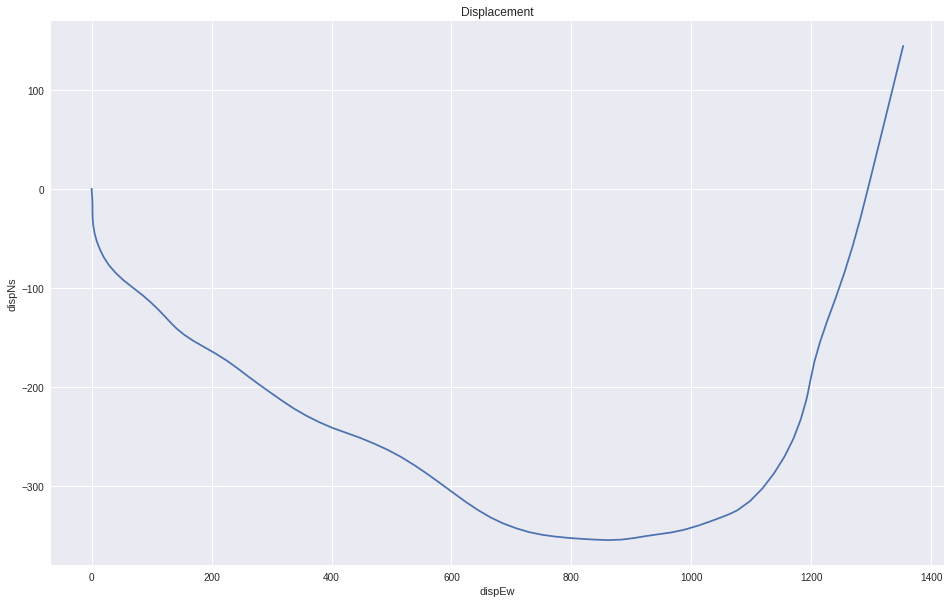

In [15]:
sc.plts_traj(traj_wellbore,"dispEw","dispNs","Displacement","")

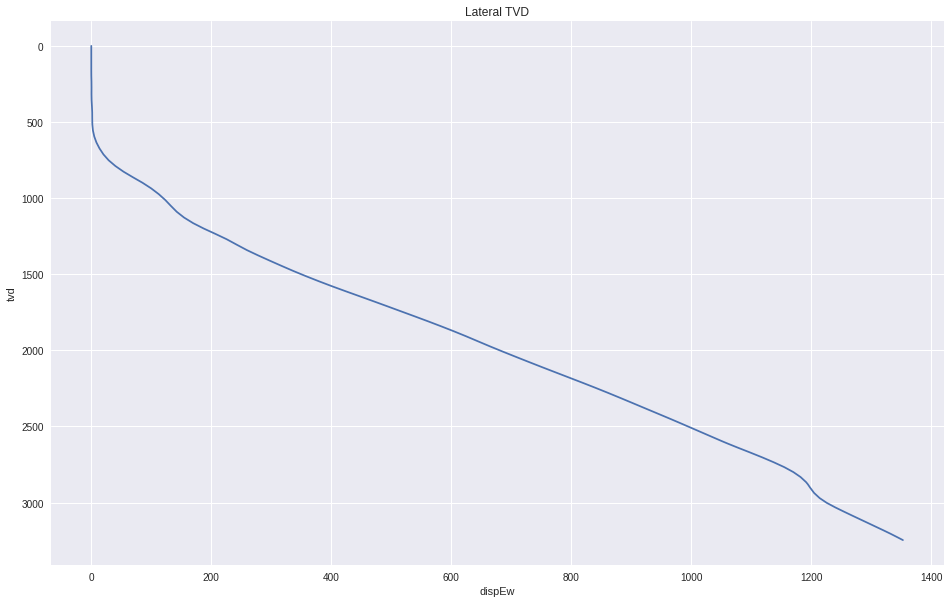

In [16]:
sc.plts_traj(traj_wellbore,"dispEw","tvd","Lateral TVD","invert")

file:///home/luis/Downloads/newplot%20(6).png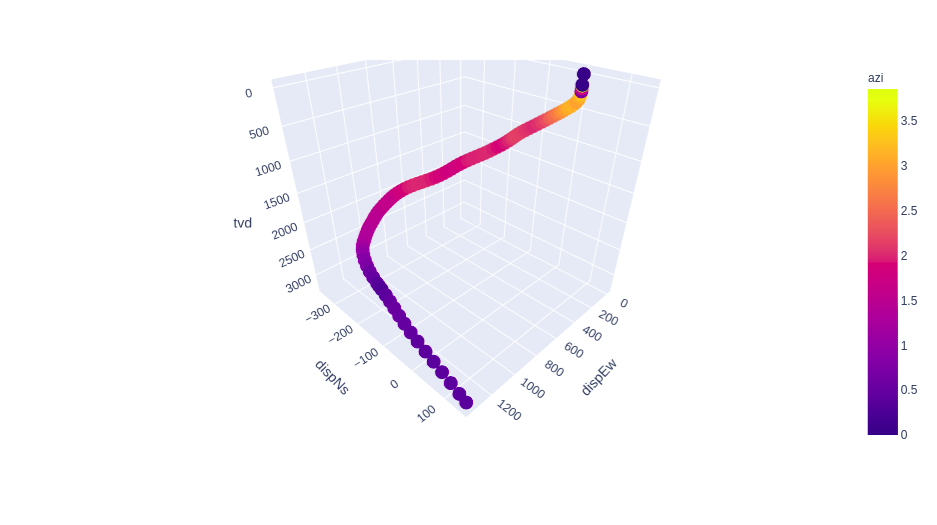

file:///home/luis/Downloads/newplot%20(7).png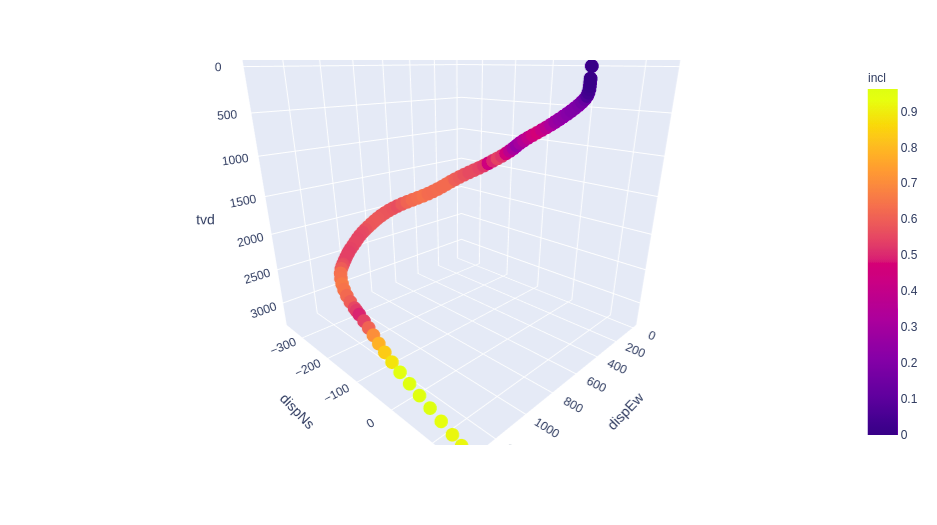

In [21]:
fig = px.scatter_3d(traj_wellbore,"dispEw","dispNs","tvd",color = "dls")
fig.update_scenes(zaxis_autorange = "reversed")
fig.show()

file:///home/luis/Downloads/newplot%20(8).png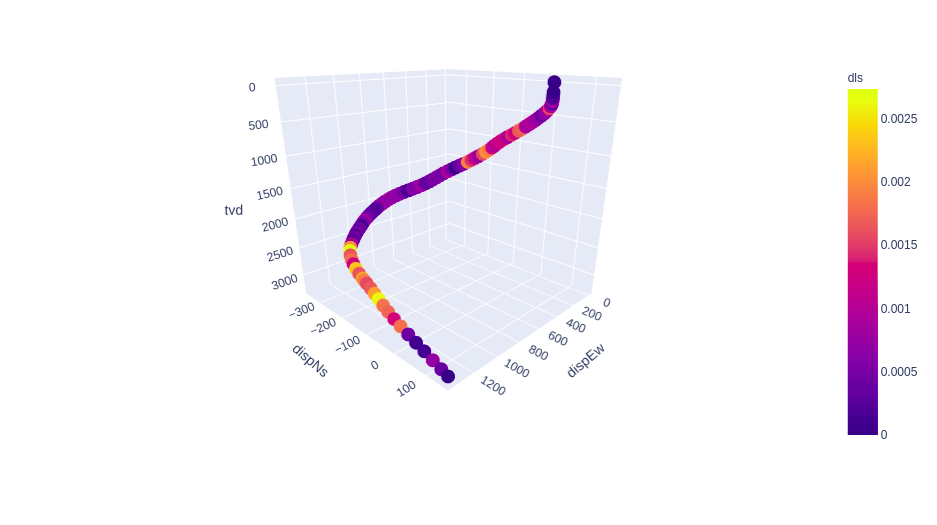

## Planned trajectory against actual

df = pd.read_excel("Book1.xlsx")